# Code for QLS project - Francesco Fontana

In [1]:
defaultW <- getOption("warn") # current warning option
options(warn = -1)  # remove warning from now on

In [3]:
#install.packages("tidyverse")
#install.packages("tibble")
#install.packages("magrittr")
#install.packages("dplyr")
#install.packages("reshape2")
#install.packages("latex2exp")
#install.packages("gridExtra")
#install.packages("tikzDevice")
#install.packages("truncnorm")
#install.packages("igraph")
#install.packages('pracma')
#install.packages('akima')
#install.packages('rgl')

## Load required packages 
library(tidyverse)
library(tibble)
library(magrittr)
library(dplyr)
library(reshape2)
library(latex2exp)
library(gridExtra)
library(tikzDevice)
library(pracma)
library(akima)
library(rgl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘pracma’


The following objects are masked from ‘package:magrittr’:

    and, mod, or


The following object is masked from ‘package:purrr’:

    cross


This build of rgl does not include OpenGL functions.  Use
 rglwidg

In [4]:
# load support files
source("lemke-howson.R")
source("build_functions.R")

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: truncnorm

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [5]:
### PLOT OF A GAUSSIAN
options(repr.plot.width=10, repr.plot.height=6)  #to set graph size


pdf("images/simmetric_distribution.pdf") # to save the plot

n=1e6
r <- rnorm(n)
hist(r,breaks = 40, prob=TRUE,col= "Orange", xlab="",ylab="",  cex.axis=2, cex.main=2, main = "Simmetric Gaussian Distribution")
curve(dnorm(x, mean=0, sd=1), col="black", lwd=3, add=TRUE, yaxt="n")

dev.off()

png 
  2

In [6]:
# getOption("tikzLatex")
options("tikzLatex"='/usr/bin/pdflatex')

options(repr.plot.width=16, repr.plot.height=7)  #to set graph size
par(mar=c(5, 5, 4, 2), cex=1.5)#, mfrow= c(1,2))

## Example of dynamical pruning under Lotka-Volterra dynamics

In [84]:
## Set parameter values
n <- 1200 ## number of species in the original community
params_interactions <- list(build.structure = build.no.structure, ## completely filled matrix
                            build.matrix = build.normal,          ## normal distribution sampling for Aij 
                            u = 0,                                ## mean of interactions
                            d = -1,                               ## original mean diagonal 
                            sd = 1                                ## standard deviation of interactions
                            )
params_growth_rates <- list(u = 0,                   ## mean of growth rates
                            sd = 1                   ## sd of growth rates   
                            )
A <- build.random.structure.dstable(n, params_interactions) ## set interaction matrix
r <- build.normal.gr(n, params_growth_rates)                ## set growth rate
M <- build.rep(A, r, n)                                     ## set payoff matrix for replicator dynamics

In [85]:
### Run dynamics
y <- lemkeHowson_symmetric(M)  ## get Nash equilibrium of the game
S <- y$subset                  ## Subset of coexisting species
x <- toLV(y$eq, n)[S]          ## equilibrium of LV model
B <- M[S, S]                   ## Final interaction Matrix
v <- r[S]                      ## Final vector of growth rates

In [86]:
cat("The number of coexisting species is:", length(S), "out of", n ) # number of coexisting species

The number of coexisting species is: 629 out of 1200

### Compare eigenvalue distribution

Before and after dynamical pruning.

png 
  2

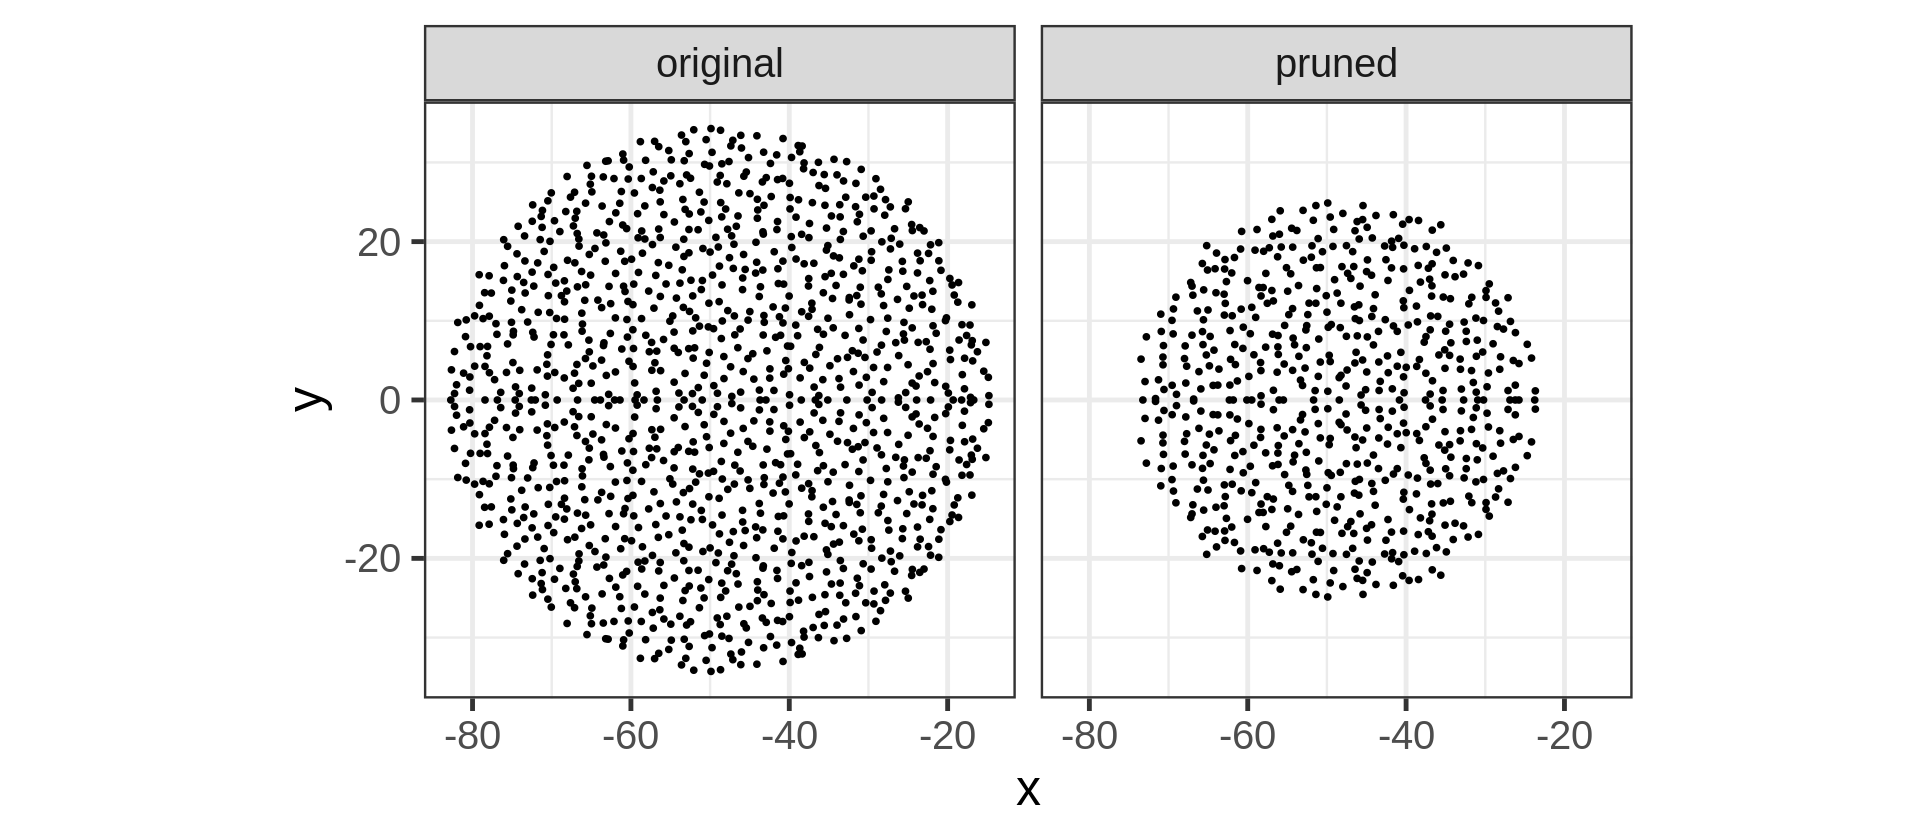

In [87]:
options(repr.plot.width=16, repr.plot.height=7)  #to set graph size

evals_pruned <- eigen(B, only.values = TRUE)$values  
evals_original  <- eigen(A, only.values = TRUE)$values

Evals_pruned <- data_frame(x = Re(evals_pruned),
                           y = Im(evals_pruned), 
                           type = "pruned")
Evals_original <- data_frame(x = Re(evals_original),
                             y = Im(evals_original),
                             type = "original")

Evals <- Evals_pruned %>% bind_rows(Evals_original)


plot_evals_comparison <- Evals %>% ggplot(aes(x = x, y = y)) + geom_point()  +
    facet_grid(.~type) + theme_bw(base_size = 30) + coord_fixed()

plot_evals_comparison
pdf("images/Evals_original_pruned.pdf",width= 12, height=6) # to save the plot
plot_evals_comparison
dev.off()

### Compare distribution of coefficients


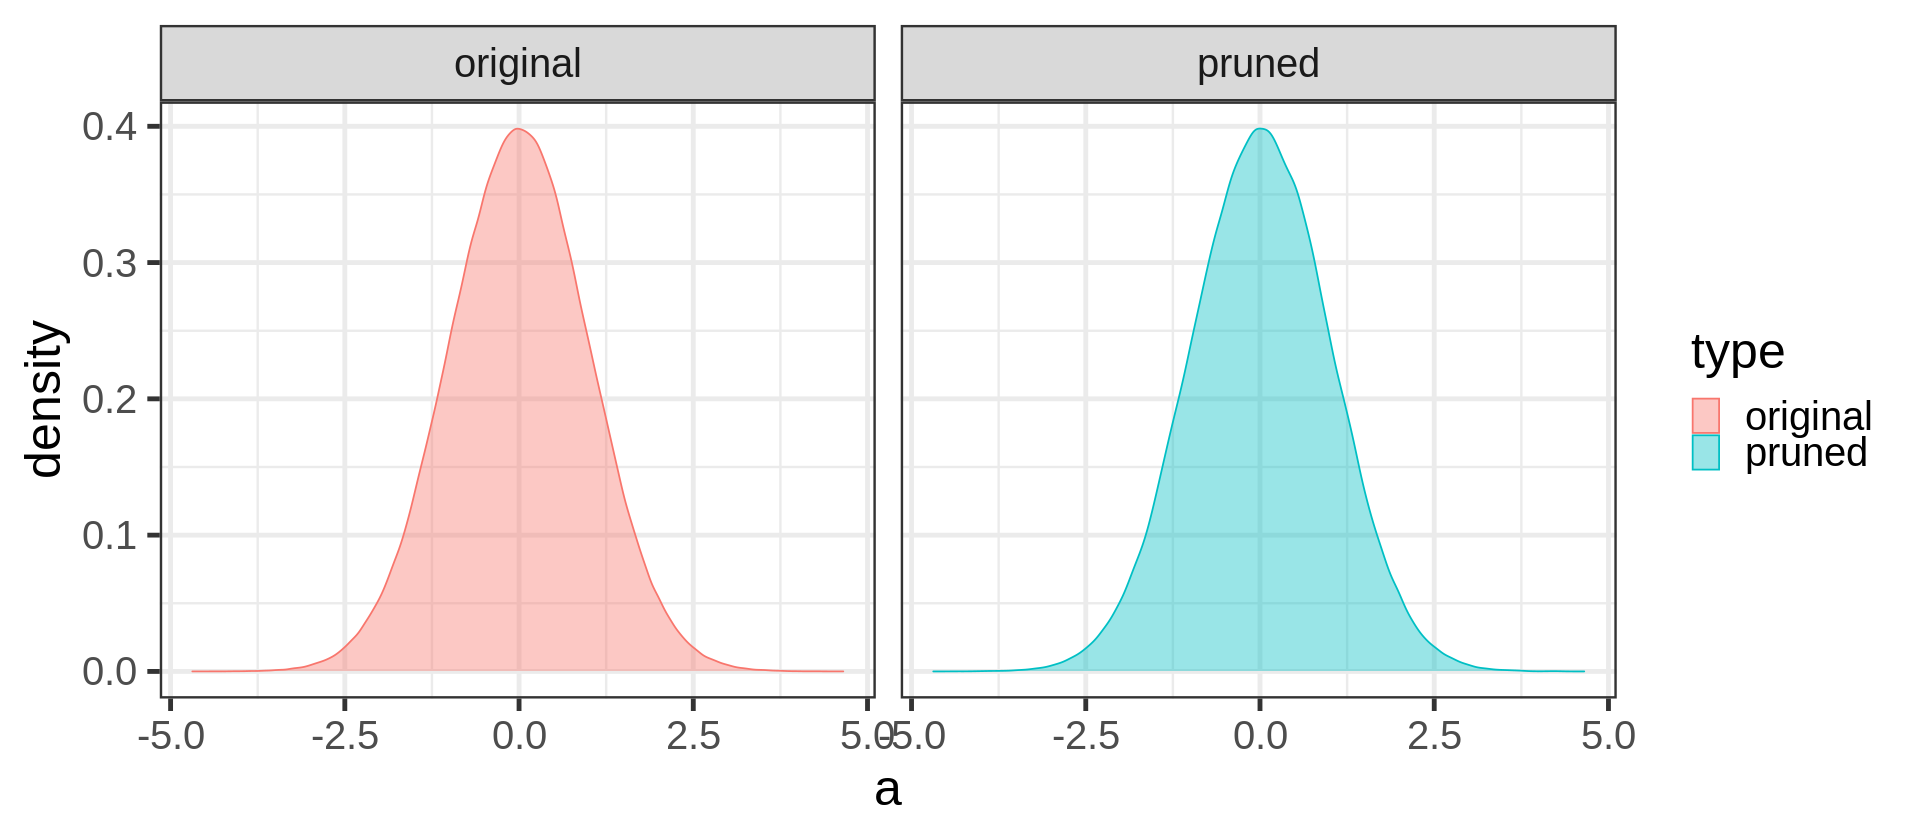

In [88]:
Dist_coeff_o <- data_frame(a = A[upper.tri(A)], type = "original")
Dist_coeff <- data_frame(a = B[upper.tri(B)], type = "pruned")
Dist_coeff <- Dist_coeff %>% bind_rows(Dist_coeff_o)


Dist_coeff %>% ggplot(aes(x = a, fill = type, colour = type)) +
    geom_density(alpha = 0.4) + facet_grid(cols = vars(type)) + theme_bw(base_size = 30)



### Compared distribution of growth rates


png 
  2

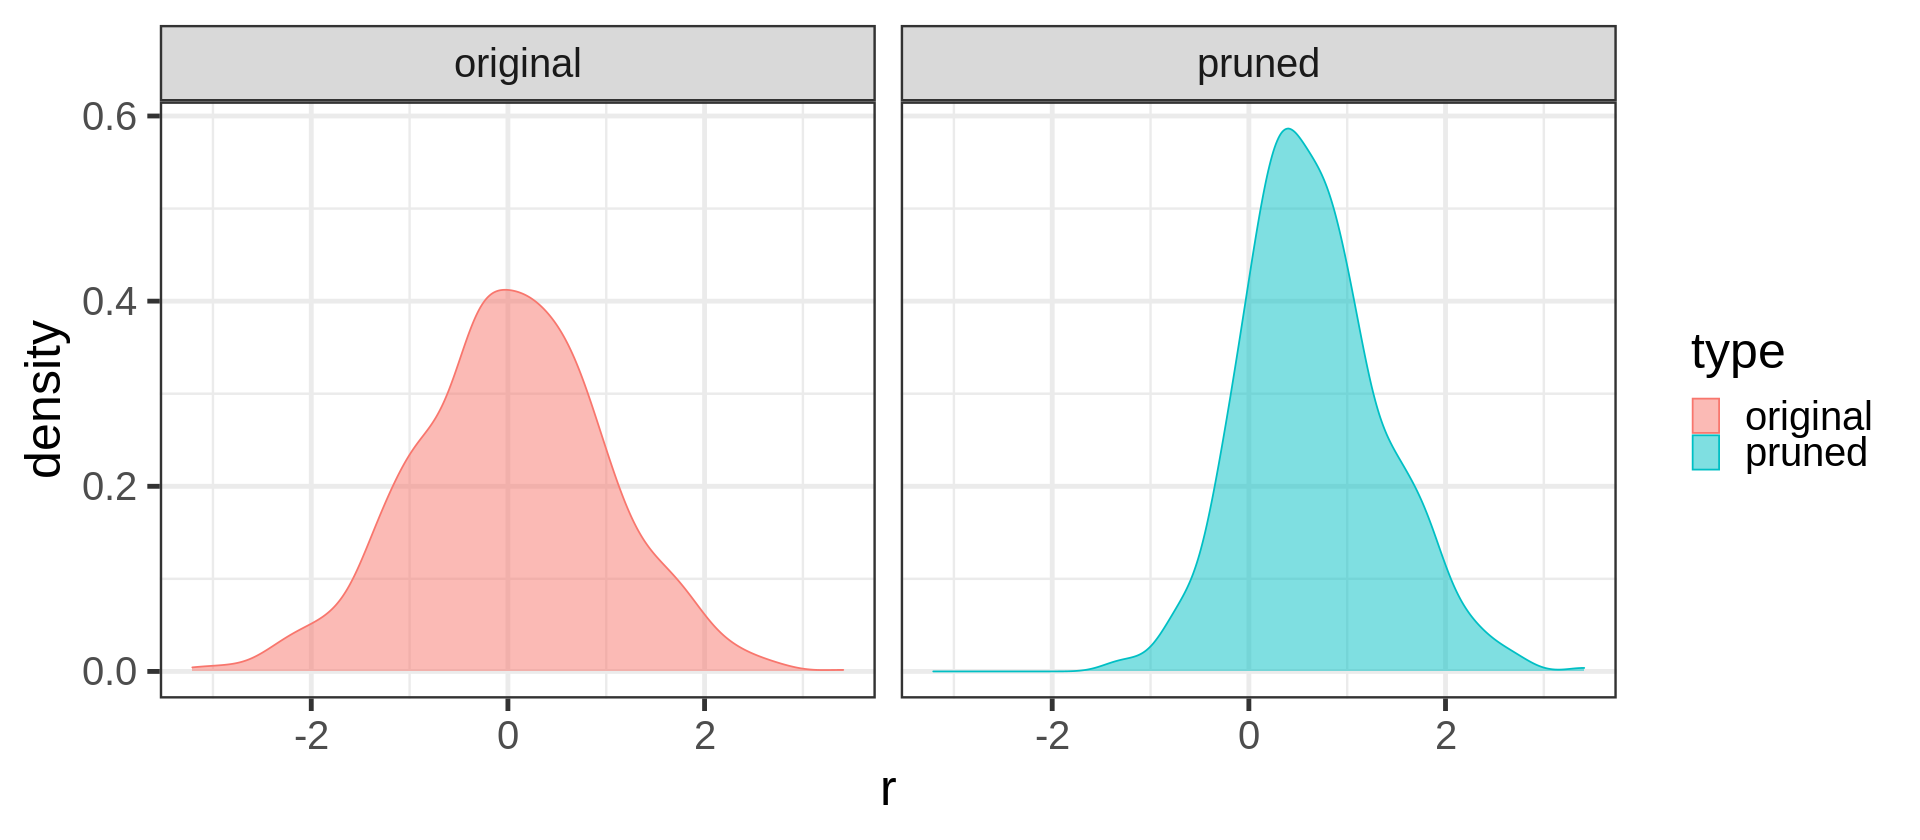

In [89]:
options(repr.plot.width=16, repr.plot.height=7)  #to set graph size

Dist_growth_rates <- data_frame(r = v, type = "pruned") %>% bind_rows(data_frame(r = r, type = "original"))

plot_GR_comparison <- Dist_growth_rates %>% ggplot(aes(x = r, fill = type, colour = type)) +
    geom_density(alpha = 0.5) + facet_grid(cols=vars(type)) + theme_bw(base_size = 30)+
    theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA), 
            legend.background = element_rect(fill = "transparent", color = NA)) # bg of the plot

plot_GR_comparison
pdf("images/GR_original_vs_pruned.pdf",width= 12, height=6) # to save the plot
plot_GR_comparison
dev.off()

# Numerical computation of distribution of attractor's sizes

## Simulations no structure, $r_i$ from normal distribution with mean 0

Expectation distribution is a binomial with $p=\frac{1}{2}$

In [13]:
# function to replicate LV dynamics a nsim of times, for communities with n species
get_distribution_sizes_attractors <- function(n, nsim,
                                              params_interactions,
                                              params_growth_rates){
    sizes <- map_dbl(1:nsim, function(i){
        A <- build.random.structure.dstable(n, params_interactions)
        r <- build.normal.gr(n, params_growth_rates)
        M <- build.rep(A, r, n)
        y <- lemkeHowson_symmetric(M)
        return (length(y$subset))
    })

    D <- data_frame(n = n, k = sizes, mu = params_interactions$u, sd = params_interactions$sd, gamma = params_growth_rates$u)
    
    ## convert to frequencies, if needed the grouping can be done for all different parameters
    D <- D %>% group_by(k) %>% summarise(count = n()) %>% mutate(freq = count / sum(count)) %>%
        ungroup()

    return (D)
}

In [14]:
# no structure, different starting number of species n

nsim <- 10000
set.seed(2026924) ## set random seed for simulations

n1 <- 15
attractors15 <- get_distribution_sizes_attractors(n1, nsim,
                                                params_interactions,
                                                params_growth_rates )

n2 <- 5
attractors5 <- get_distribution_sizes_attractors(n2, nsim,
                                                params_interactions,
                                                params_growth_rates )

n3 <- 25
attractors25 <- get_distribution_sizes_attractors(n3, nsim,
                                                params_interactions,
                                                params_growth_rates )

In [15]:
## Binomal expectation
attractors15 <- attractors15 %>% mutate(expectation = choose(n1, k) *  0.5^n1)
attractors5  <- attractors5  %>% mutate(expectation = choose(n2, k) *  0.5^n2)
attractors25 <- attractors25 %>% mutate(expectation = choose(n3, k) *  0.5^n3)

png 
  2

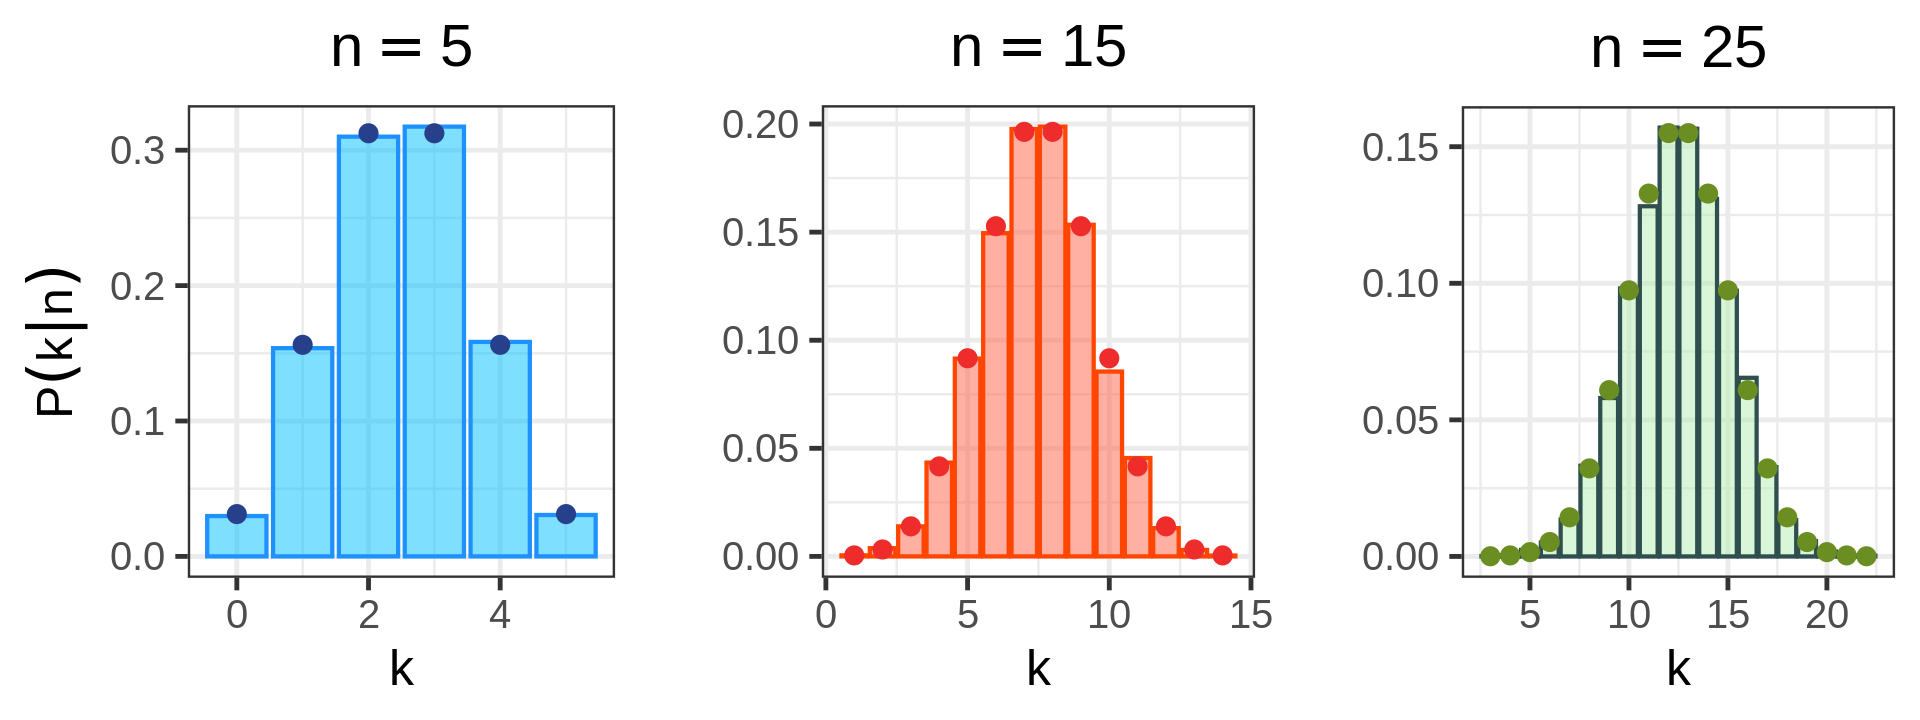

In [16]:
pdf('images/var_n_bin_plots.pdf', width=18, height=6)

## Plotting
p1 <- attractors5 %>% ggplot(aes(x = k, y = freq)) +
      geom_bar(stat = "identity", alpha = 0.5, colour = "dodgerblue", size=1.2, fill = "deepskyblue") +
      geom_point(aes(y = expectation), shape = 19, size = 5, col="royalblue4") + 
      xlab(TeX("$k$")) + ylab(TeX("$P(k|n)$")) + ggtitle(TeX("$n=5$")) + theme_bw(base_size = 30) +
      # xlab("$k$") + ylab("$\\mathcal{P}(k|n)$") + ggtitle("$n=5$") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA)) # bg of the plot
            

p2 <- attractors15 %>% ggplot(aes(x = k, y = freq)) +
      geom_bar(stat = "identity", alpha = 0.5, colour = "orangered", size=1.2, fill = "tomato") +
      geom_point(aes(y = expectation), shape = 19, size = 5, col="firebrick2") + 
      xlab(TeX("$k$")) + ylab("") + ggtitle(TeX("$n=15$")) + theme_bw(base_size = 30) +
      # xlab("$k$") + ylab("") + ggtitle("$n=15$") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA)) # bg of the plot
     
p3 <- attractors25 %>% ggplot(aes(x = k, y = freq)) +
      geom_bar(stat = "identity", alpha = 0.5, colour = "darkslategray", size=1.2, fill = "darkseagreen2") +
      geom_point(aes(y = expectation), shape = 19, size = 5, col="olivedrab") + 
      xlab(TeX("$k$")) + ylab("") + ggtitle(TeX("$n=25$")) + theme_bw(base_size = 30) +
      # xlab("$k$") + ylab("") + ggtitle("$n=25$") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA)) # bg of the plot
     
grid.arrange(p1, p2, p3, ncol=3) # plot
dev.off() # for saving the plot

options(repr.plot.width=16, repr.plot.height=6)  #to set graph size
grid.arrange(p1, p2, p3, ncol=3) # to show here the plot

## Simulation with correlation 

Sample interaction matrix terms froma bivariate gaussian distribution, with covariance term $\rho$ (``p`` in the ``params_interaction`` function).

In [17]:
params_interactions <- list(build.structure = build.no.structure, ## completely filled matrix
               build.matrix = build.cor.normal,                   ## normal matrix with correlation
               u = 0,                                             ## mean of interactions
               d = -1,                                            ## original mean diagonal (this may change to ensure stability)
               sd = 1,                                            ## standard deviation of interactions
               p  = 1                                             ## correlation rho
               )
# params_growth_rates <- list(u = 0,                   ## mean of growth rates
#                             sd = 1                   ## sd of growth rates   
#                             )


In [18]:
n <- 10
nsim <- 10000
set.seed(2026924) ## set random seed for simulations

params_interactions$p <- -0.8
attractors1 <- get_distribution_sizes_attractors(n, nsim,
                                                params_interactions,
                                                params_growth_rates )

params_interactions$p <- 0
attractors2 <- get_distribution_sizes_attractors(n, nsim,
                                                params_interactions,
                                                params_growth_rates )

params_interactions$p <- 0.8
attractors3 <- get_distribution_sizes_attractors(n, nsim,
                                                params_interactions,
                                                params_growth_rates )


In [19]:
## Again binomial expectation
attractors1 <- attractors1 %>% mutate(expectation = choose(n, k) *  0.5^n)
attractors2 <- attractors2 %>% mutate(expectation = choose(n, k) *  0.5^n)
attractors3 <- attractors3 %>% mutate(expectation = choose(n, k) *  0.5^n)

png 
  2

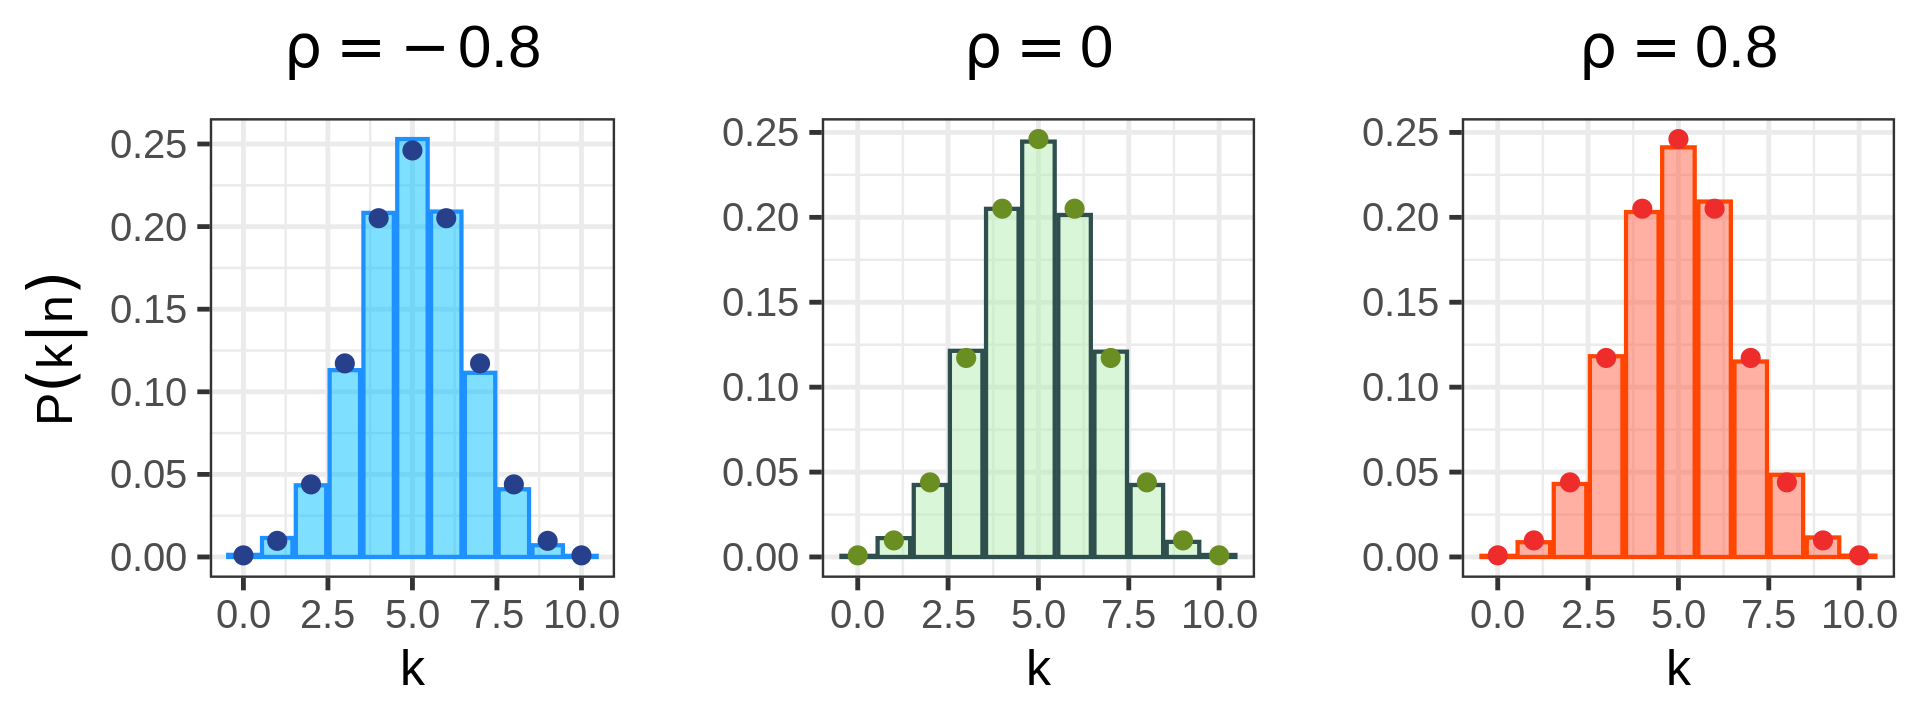

In [20]:
pdf('images/var_corr_bin_plots.pdf', width=18, height=6)

## Plotting
p1 <- attractors1 %>% ggplot(aes(x = k, y = freq)) +
      geom_bar(stat = "identity", alpha = 0.5, colour = "dodgerblue", size=1.2, fill = "deepskyblue") +
      geom_point(aes(y = expectation), shape = 19, size = 5, col="royalblue4") + 
      xlab(TeX("$k$")) + ylab(TeX("$P(k|n)$")) + ggtitle(TeX("$\\rho = -0.8$")) + theme_bw(base_size = 30) +
      # xlab("$k$") + ylab("$\\mathcal{P}(k|n)$") + ggtitle("$\\rho = -0.5$") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA)) # bg of the plot
            
p2 <- attractors2 %>% ggplot(aes(x = k, y = freq)) +
      geom_bar(stat = "identity", alpha = 0.5, colour = "darkslategray", size=1.2, fill = "darkseagreen2") +
      geom_point(aes(y = expectation), shape = 19, size = 5, col="olivedrab") + 
      xlab(TeX("$k$")) + ylab("") + ggtitle(TeX("$\\rho = 0$")) + theme_bw(base_size = 30) +
      # xlab("$k$") + ylab("") + ggtitle("$\\rho = 0$") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA)) # bg of the plot

p3 <- attractors3 %>% ggplot(aes(x = k, y = freq)) +
      geom_bar(stat = "identity", alpha = 0.5, colour = "orangered", size=1.2, fill = "tomato") +
      geom_point(aes(y = expectation), shape = 19, size = 5, col="firebrick2") + 
      xlab(TeX("$k$")) + ylab("") + ggtitle(TeX("$\\rho = 0.8$")) + theme_bw(base_size = 30) +
      # xlab("$k$") + ylab("") + ggtitle("$\\rho = 0.5$") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA)) # bg of the plot


grid.arrange(p1, p2, p3, ncol=3) # plot
dev.off() # for saving the plot

options(repr.plot.width=16, repr.plot.height=6)  #to set graph size
grid.arrange(p1, p2, p3, ncol=3) # to show here the plot

## Adding structure
Combine matrix $A$ with a structure matrix $G$. Growth rates $r_i$ sampled again from normal distribution with mean 0.

In [21]:
interactions_MF <- list(build.structure = build.fixed.matrix, ## matrix with fixed diagonal structure
                        build.matrix = build.normal,          ## normal matrix 
                        u = 0,                                ## mean of interactions
                        d = -1,                               ## original mean diagonal (this may change to ensure stability)
                        sd = 1                                ## standard deviation of interactions
                        )

interactions_PL <- list(build.structure = build.powerlaw, ## powerlaw matrix
                        build.matrix = build.normal,      ## normal matrix 
                        exponent = 2.5,                   ## exponent for power law correlations
                        c = 0.2,                          ## connectance
                        u = 0,                            ## mean of interactions
                        d = -1,                           ## original mean diagonal (this may change to ensure stability)
                        sd = 1                            ## standard deviation of interactions
                        )

interactions_2B <- list(build.structure = build.2.blocks, ## 2 interacting blocks matrix
                        build.matrix = build.normal,      ## normal matrix 
                        c_between = 0.2,                  ## connectance between the 2 blocks
                        c_within = 0.2,                   ## connectance within each block
                        block_ratio = 0.3,                ## proportion of the 2 blocks
                        u = 0,                            ## mean of interactions
                        d = -1,                           ## original mean diagonal (this may change to ensure stability)
                        sd = 1                            ## standard deviation of interactions
                        )

params_growth_rates <- list(u = 0,                   ## mean of growth rates
                            sd = 1                   ## sd of growth rates   
                            )

n <- 10
nsim <- 10000
set.seed(2026924) ## set random seed for simulations

In [22]:
attractors_MF <- get_distribution_sizes_attractors(n, nsim,
                                                   interactions_MF,
                                                   params_growth_rates )

In [23]:
attractors_PL <- get_distribution_sizes_attractors(n, nsim,
                                                   interactions_PL,
                                                   params_growth_rates )

In [24]:
attractors_2B <- get_distribution_sizes_attractors(n, nsim,
                                                   interactions_2B,
                                                   params_growth_rates )

In [25]:
## In this case we can get a binomal expectation
attractors_MF <- attractors_MF %>% mutate(expectation = choose(n, k) *  0.5^n)
attractors_PL <- attractors_PL %>% mutate(expectation = choose(n, k) *  0.5^n)
attractors_2B <- attractors_2B %>% mutate(expectation = choose(n, k) *  0.5^n)

png 
  2

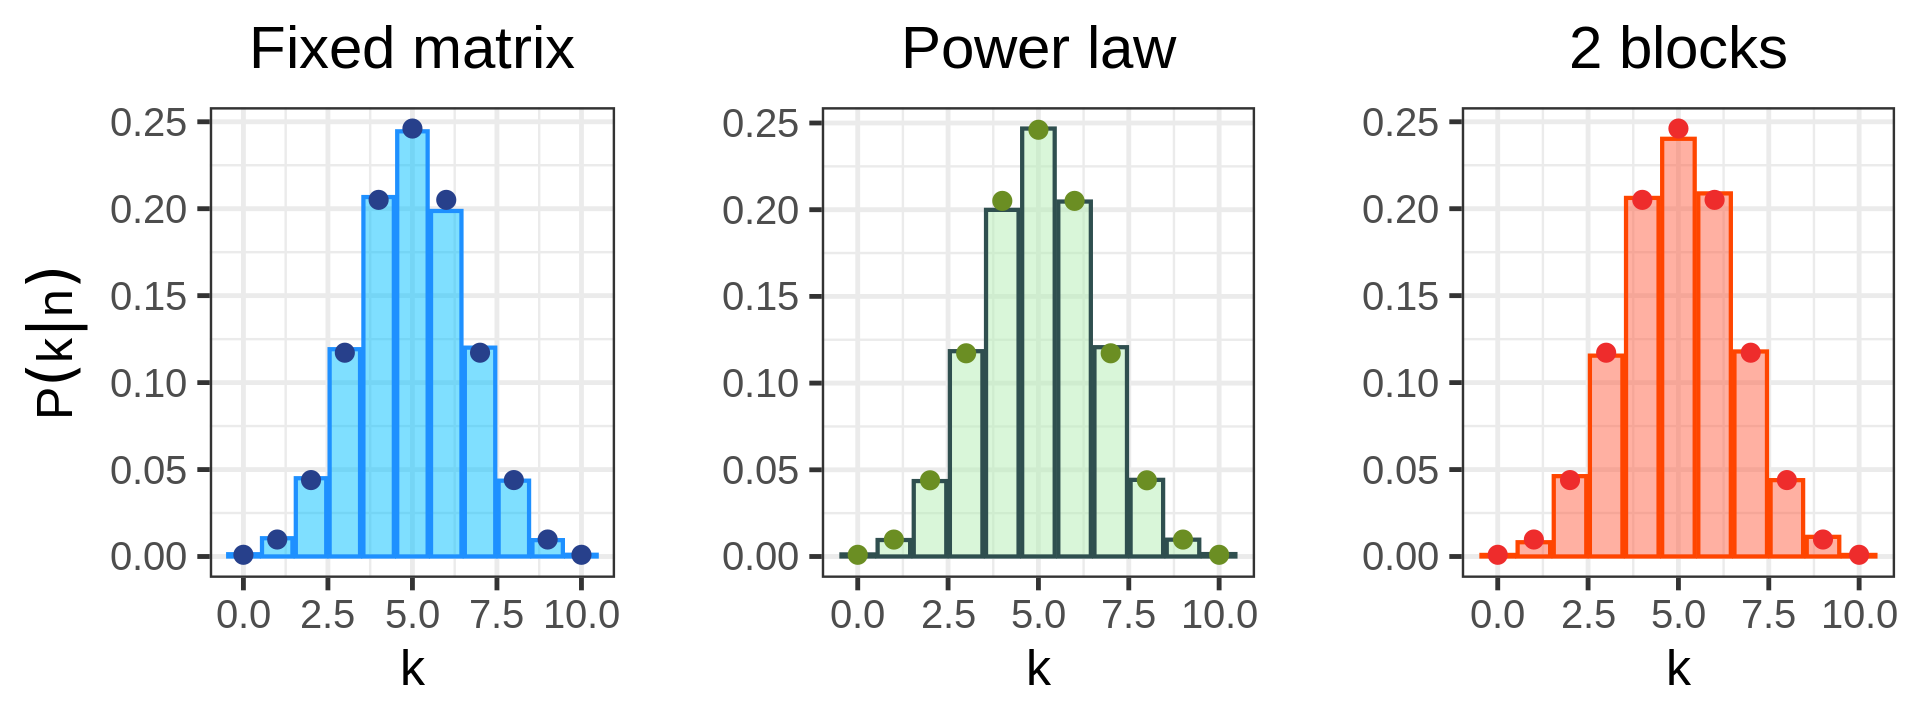

In [26]:
pdf('images/var_struct_plots.pdf', width=18, height=6)

## Plotting
p1s <- attractors_MF %>% ggplot(aes(x = k, y = freq)) +
      geom_bar(stat = "identity", alpha = 0.5, colour = "dodgerblue", size=1.2, fill = "deepskyblue") +
      geom_point(aes(y = expectation), shape = 19, size = 5, col="royalblue4") + 
      xlab(TeX("$k$")) + ylab(TeX("$P(k|n)$")) + ggtitle(TeX("Fixed matrix")) + theme_bw(base_size = 30) +
      # xlab("$k$") + ylab("$\\mathcal{P}(k|n)$") + ggtitle("Fixed matrix") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA)) # bg of the plot
            
p2s <- attractors_PL %>% ggplot(aes(x = k, y = freq)) +
      geom_bar(stat = "identity", alpha = 0.5, colour = "darkslategray", size=1.2, fill = "darkseagreen2") +
      geom_point(aes(y = expectation), shape = 19, size =5, col="olivedrab") + 
      xlab(TeX("$k$")) + ylab("") + ggtitle(TeX("Power law")) + theme_bw(base_size = 30) +
      # xlab("$k$") + ylab("") + ggtitle("Power law") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA)) # bg of the plot

p3s <- attractors_2B %>% ggplot(aes(x = k, y = freq)) +
      geom_bar(stat = "identity", alpha = 0.5, colour = "orangered", size=1.2, fill = "tomato") +
      geom_point(aes(y = expectation), shape = 19, size = 5, col="firebrick2") + 
      xlab(TeX("$k$")) + ylab("") + ggtitle(TeX("2 blocks")) + theme_bw(base_size = 30) +
      # xlab("$k$") + ylab("") + ggtitle("2 blocks") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA)) # bg of the plot


grid.arrange(p1s, p2s, p3s, ncol=3) # plot
dev.off() # for saving the plot

options(repr.plot.width=16, repr.plot.height=6)  #to set graph size
grid.arrange(p1s, p2s, p3s, ncol=3) # to show here the plot

png 
  2

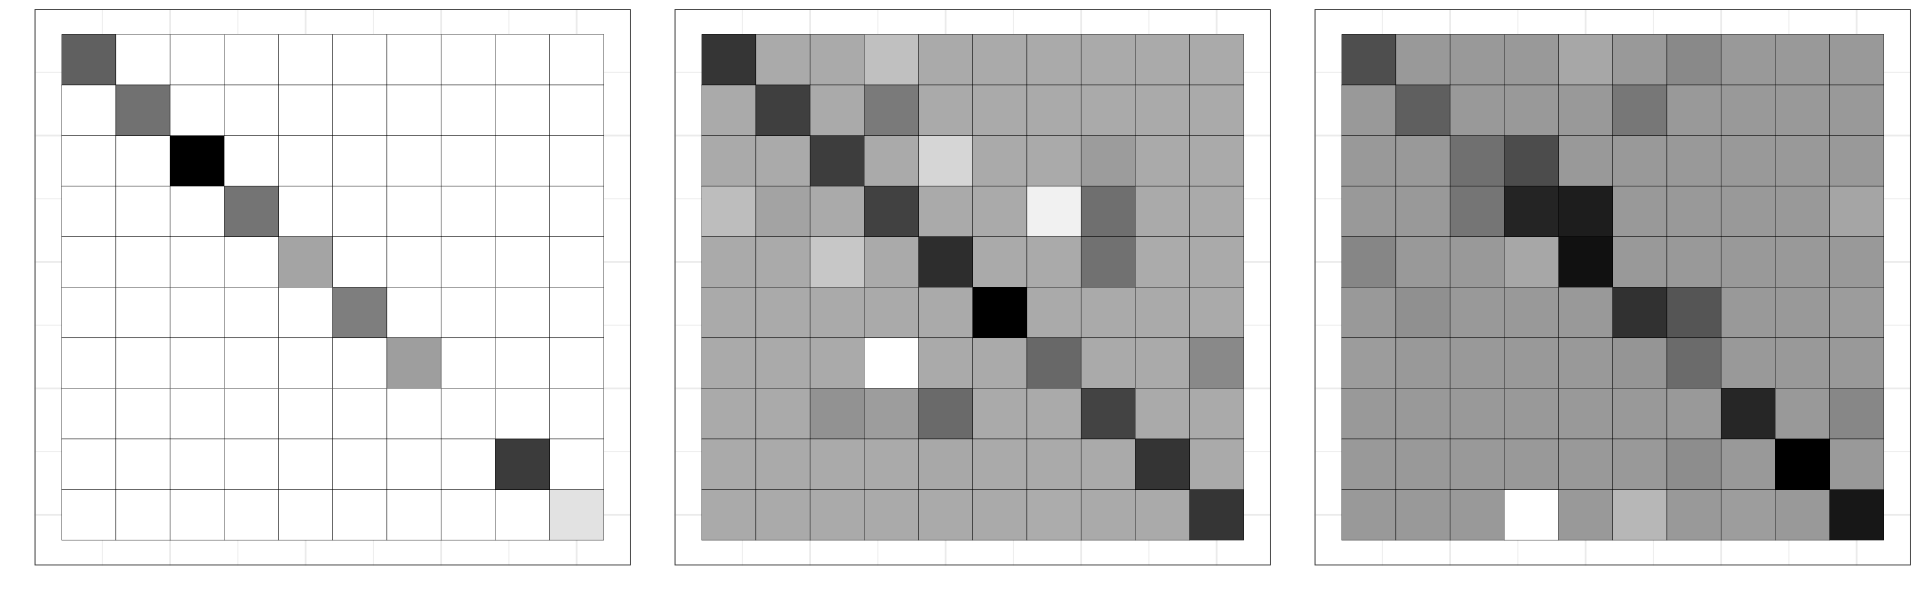

In [27]:
# Example of interaction matrices with structure
pdf('images/LDS_matrix_plots.pdf', width=18, height=6)
set.seed(2026924) ## set random seed for simulations

mat_fixeds <- build.random.structure.dstable(n, interactions_MF)
mat_powerl <- build.random.structure.dstable(n, interactions_PL)
mat_2block <- build.random.structure.dstable(n, interactions_2B)

## Plotting
p1_s <- ggplot(melt(mat_fixeds), aes(x=Var1, y=Var2, fill=value)) + geom_tile(colour='black', show.legend = FALSE) +
      scale_y_reverse() + scale_fill_gradient(high = "white", low = "black") + theme_bw() +
      xlab("") + ylab("") + 
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA), axis.text.y=element_blank(),
            axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.ticks.y=element_blank()) # bg of the plot

p2_s <- ggplot(melt(mat_powerl), aes(x=Var1, y=Var2, fill=value)) + geom_tile(colour='black', show.legend = FALSE) +
      scale_y_reverse() + scale_fill_gradient(high = "white", low = "black") +
      xlab("") + ylab("") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA), axis.text.y=element_blank(),
            axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.ticks.y=element_blank()) # bg of the plot

p3_s <- ggplot(melt(mat_2block), aes(x=Var1, y=Var2, fill=value)) + geom_tile(colour='black', show.legend = FALSE) +
      scale_y_reverse() + scale_fill_gradient(high = "white", low = "black") +
      xlab("") + ylab("") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA), axis.text.y=element_blank(),
            axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.ticks.y=element_blank()) # bg of the plot

grid.arrange(p1_s, p2_s, p3_s, ncol=3) # plot
dev.off() # for saving the plot

options(repr.plot.width=16, repr.plot.height=5)  #to set graph size
grid.arrange(p1_s, p2_s, p3_s, ncol=3) # to show here the plot

png 
  2

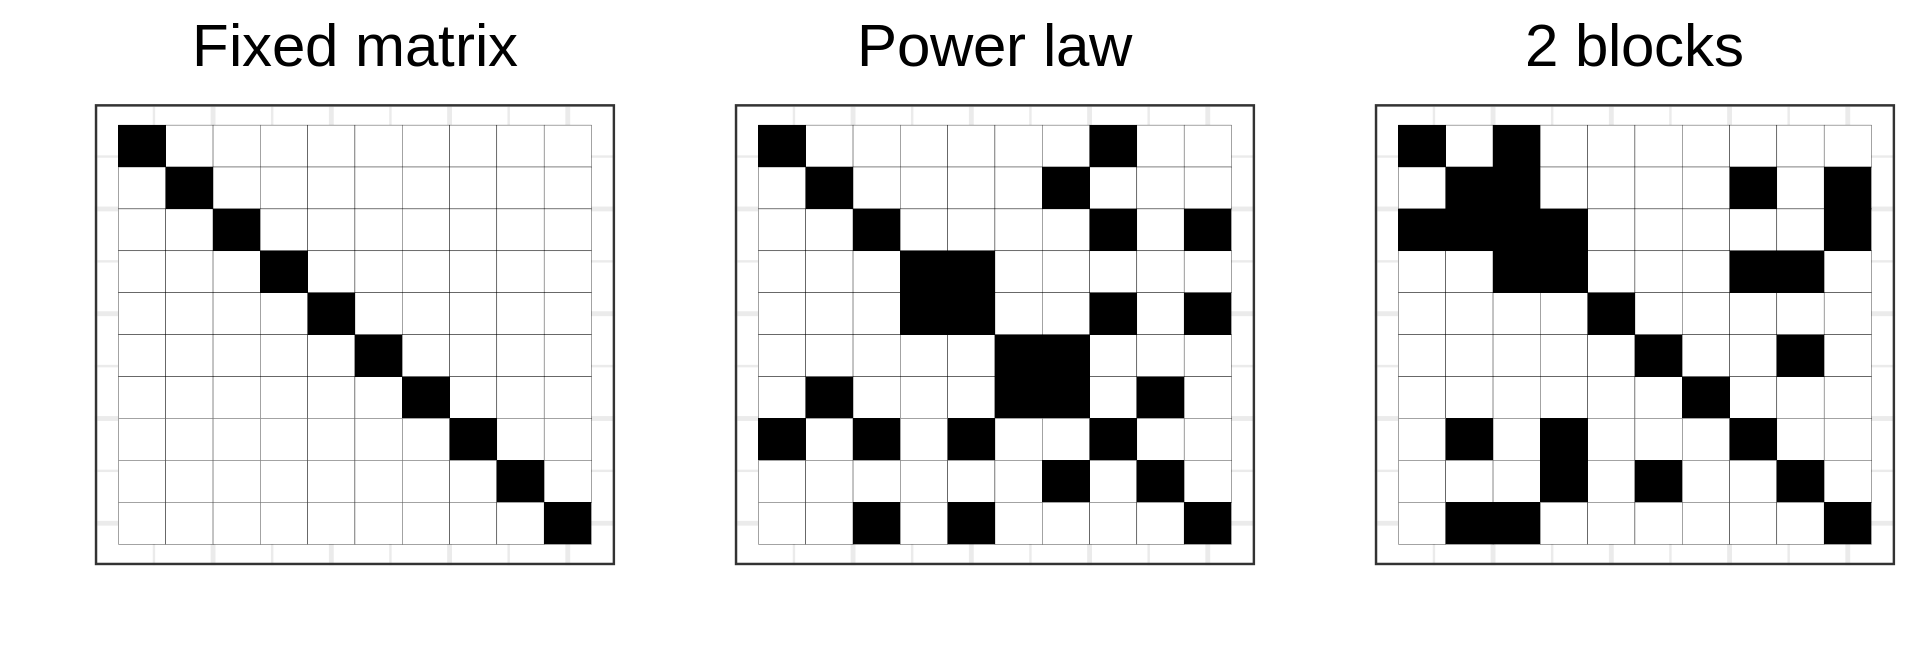

In [28]:
# Examples of structure matrices
pdf('images/A_matrix_struct_plots.pdf', width=18, height=6.5)
set.seed(2026924) ## set random seed for simulations

mat_fixeds <- interactions_MF$build.structure(n, interactions_MF)
mat_powerl <- interactions_PL$build.structure(n, interactions_PL)
mat_2block <- interactions_2B$build.structure(n, interactions_2B)

## Plotting
p1_A <- ggplot(melt(mat_fixeds), aes(x=Var1, y=Var2, fill=value)) + geom_tile(colour='black', show.legend = FALSE) +
      scale_y_reverse() + scale_fill_gradient(high = "white", low = "black") +
      xlab("") + ylab("") + ggtitle("Fixed matrix") + theme_bw(base_size = 30) +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA), axis.text.y=element_blank(),
            axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.ticks.y=element_blank()) # bg of the plot

p2_A <- ggplot(melt(mat_powerl), aes(x=Var1, y=Var2, fill=value)) + geom_tile(colour='black', show.legend = FALSE) +
      scale_y_reverse() + scale_fill_gradient(low = "white", high = "black") +
      xlab("") + ylab("") + ggtitle("Power law") + theme_bw(base_size = 30) +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA), axis.text.y=element_blank(),
            axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.ticks.y=element_blank()) # bg of the plot

p3_A <- ggplot(melt(mat_2block), aes(x=Var1, y=Var2, fill=value)) + geom_tile(colour='black', show.legend = FALSE) +
      scale_y_reverse() + scale_fill_gradient(low = "white", high = "black") +
      xlab("") + ylab("") + ggtitle("2 blocks") + theme_bw(base_size = 30) + 
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA), axis.text.y=element_blank(),
            axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.ticks.y=element_blank()) # bg of the plot

grid.arrange(p1_A, p2_A, p3_A, ncol=3) # plot
dev.off() # for saving the plot

options(repr.plot.width=16, repr.plot.height=5.5)  #to set graph size
grid.arrange(p1_A, p2_A, p3_A, ncol=3) # to show here the plot

In [29]:
interactions_BP <- list(build.structure = build.full.bipartite, ## modular matrix
                        build.matrix = build.normal,            ## normal matrix 
                        c = 0.2,                                ## connectance
                        block_ratio = 0.3,                      ## proportion of the 2 blocks
                        c_ratio = 0.2,                          ## ratio of the connectance within and among blocks
                        u = 0,                                  ## mean of interactions
                        d = -1,                                 ## original mean diagonal (this may change to ensure stability)
                        sd = 1                                  ## standard deviation of interactions
                        )

interactions_MD <- list(build.structure = build.full.inblocks, ## modular matrix
                        build.matrix = build.normal,           ## normal matrix 
                        c = 0.2,                               ## connectance
                        block_ratio = 0.3,                     ## proportion of the 2 blocks
                        c_ratio = 2,                           ## ratio of the connectance within and among blocks
                        u = 0,                                 ## mean of interactions
                        d = -1,                                ## original mean diagonal (this may change to ensure stability)
                        sd = 1                                 ## standard deviation of interactions
                        )

interactions_ER <- list(build.structure = build.random.structure, ## Erdos-Renyi random graph structure
                        build.matrix = build.normal,              ## normal matrix 
                        c = 0.2,                                  ## connectance
                        u = 0,                                    ## mean of interactions
                        d = -1,                                   ## original mean diagonal (this may change to ensure stability)
                        sd = 1                                    ## standard deviation of interactions
                        )

png 
  2

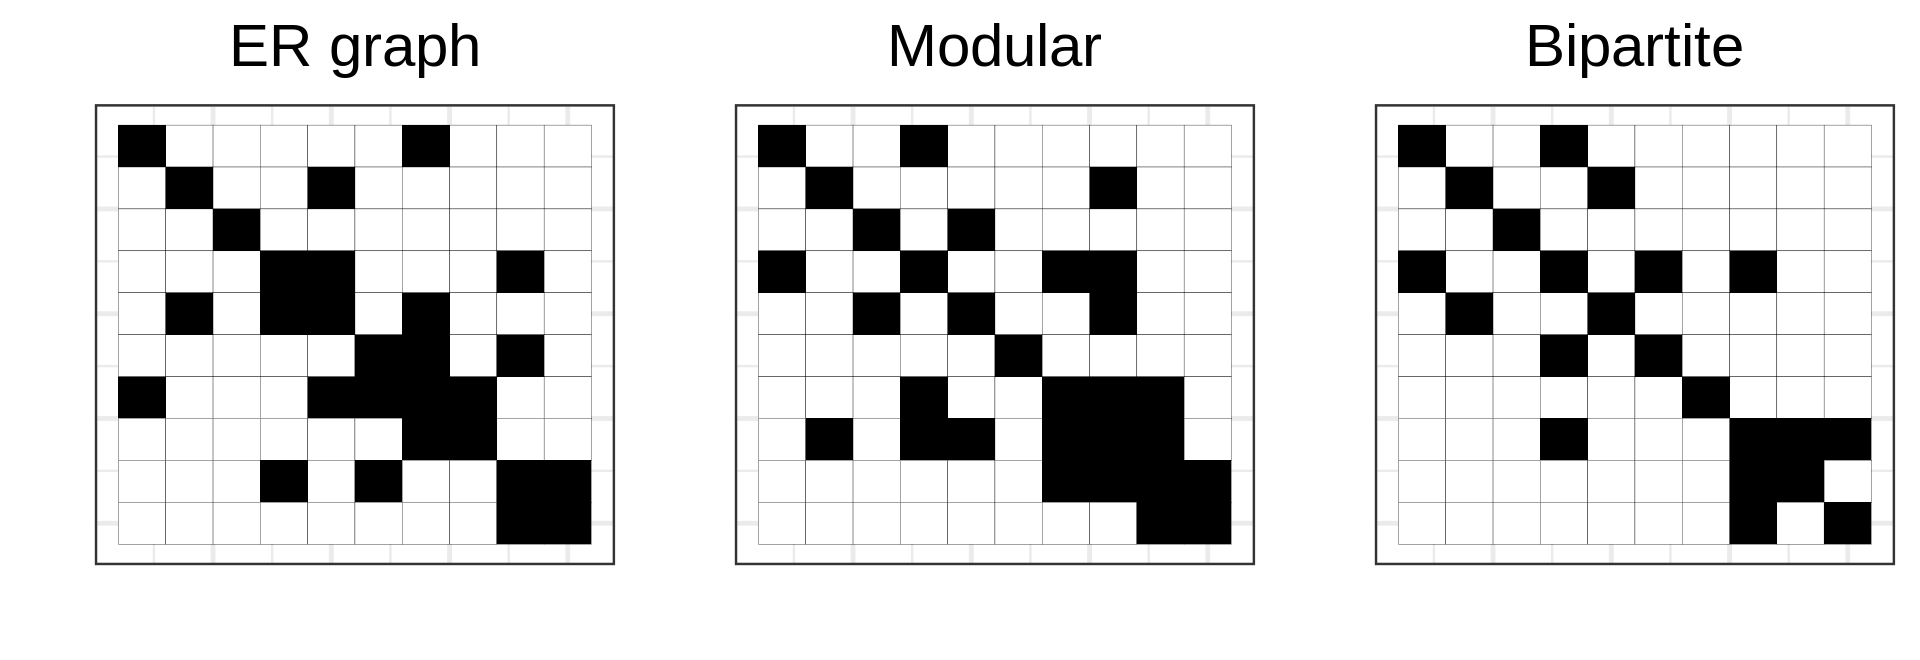

In [30]:
# Other examples of structure matrices - for support slides

pdf('images/A_matrix_struct_other_plots.pdf', width=18, height=6.5)
set.seed(2026924) ## set random seed for simulations

mat_random <- interactions_ER$build.structure(n, interactions_ER)
mat_modula <- interactions_MD$build.structure(n, interactions_MD)
mat_bipart <- interactions_BP$build.structure(n, interactions_BP)

## Plotting
p1_A1 <- ggplot(melt(mat_random), aes(x=Var1, y=Var2, fill=value)) + geom_tile(colour='black', show.legend = FALSE) +
      scale_y_reverse() + scale_fill_gradient(low = "white", high = "black") +
      xlab("") + ylab("") + ggtitle("ER graph") + theme_bw(base_size = 30) +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA), axis.text.y=element_blank(),
            axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.ticks.y=element_blank()) # bg of the plot

p2_A1 <- ggplot(melt(mat_modula), aes(x=Var1, y=Var2, fill=value)) + geom_tile(colour='black', show.legend = FALSE) +
      scale_y_reverse() + scale_fill_gradient(low = "white", high = "black") +
      xlab("") + ylab("") + ggtitle("Modular") + theme_bw(base_size = 30) +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA), axis.text.y=element_blank(),
            axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.ticks.y=element_blank()) # bg of the plot

p3_A1 <- ggplot(melt(mat_bipart), aes(x=Var1, y=Var2, fill=value)) + geom_tile(colour='black', show.legend = FALSE) +
      scale_y_reverse() + scale_fill_gradient(low = "white", high = "black") +
      xlab("") + ylab("") + ggtitle("Bipartite") + theme_bw(base_size = 30) + 
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA), axis.text.y=element_blank(),
            axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.ticks.y=element_blank()) # bg of the plot

grid.arrange(p1_A1, p2_A1, p3_A1, ncol=3) # plot
dev.off() # for saving the plot

options(repr.plot.width=16, repr.plot.height=5.5)  #to set graph size
grid.arrange(p1_A1, p2_A1, p3_A1, ncol=3) # to show here the plot

## Mean $\neq 0$

Sample growth rates from a gaussian distribution with non-zero mean. Fixed interaction matrix (interacting competitors model).

In [31]:
interactions_FX <- list(build.structure = build.fixed.matrix, 
                        build.matrix = build.no.structure, 
                        u = -0.5,                             ## off-diagonal terms
                        d = -1                                ## diagonal terms
                        )

params_gr1 <- list(u = 1,                   ## mean of growth rates
                   sd = 1                   ## sd of growth rates   
                   )

params_gr2 <- list(u = 2,                   ## mean of growth rates
                   sd = 1                   ## sd of growth rates   
                   )

params_gr05 <- list(u = 0.5,                 ## mean of growth rates
                   sd = 1                   ## sd of growth rates   
                   )

n <- 15
nsim <- 10000
set.seed(2026924) ## set random seed for simulations

In [32]:
attractors_1 <- get_distribution_sizes_attractors(n, nsim, interactions_FX, params_gr1)
attractors_2 <- get_distribution_sizes_attractors(n, nsim, interactions_FX, params_gr2)
attractors_05 <- get_distribution_sizes_attractors(n, nsim, interactions_FX, params_gr05)

In [33]:
attractors_1 <- attractors_1 %>% mutate(expectation = choose(n, k) * (0.5)^n)
attractors_2 <- attractors_2 %>% mutate(expectation = choose(n, k) * (0.5)^n)
attractors_05 <- attractors_05 %>% mutate(expectation = choose(n, k) * (0.5)^n)

png 
  2

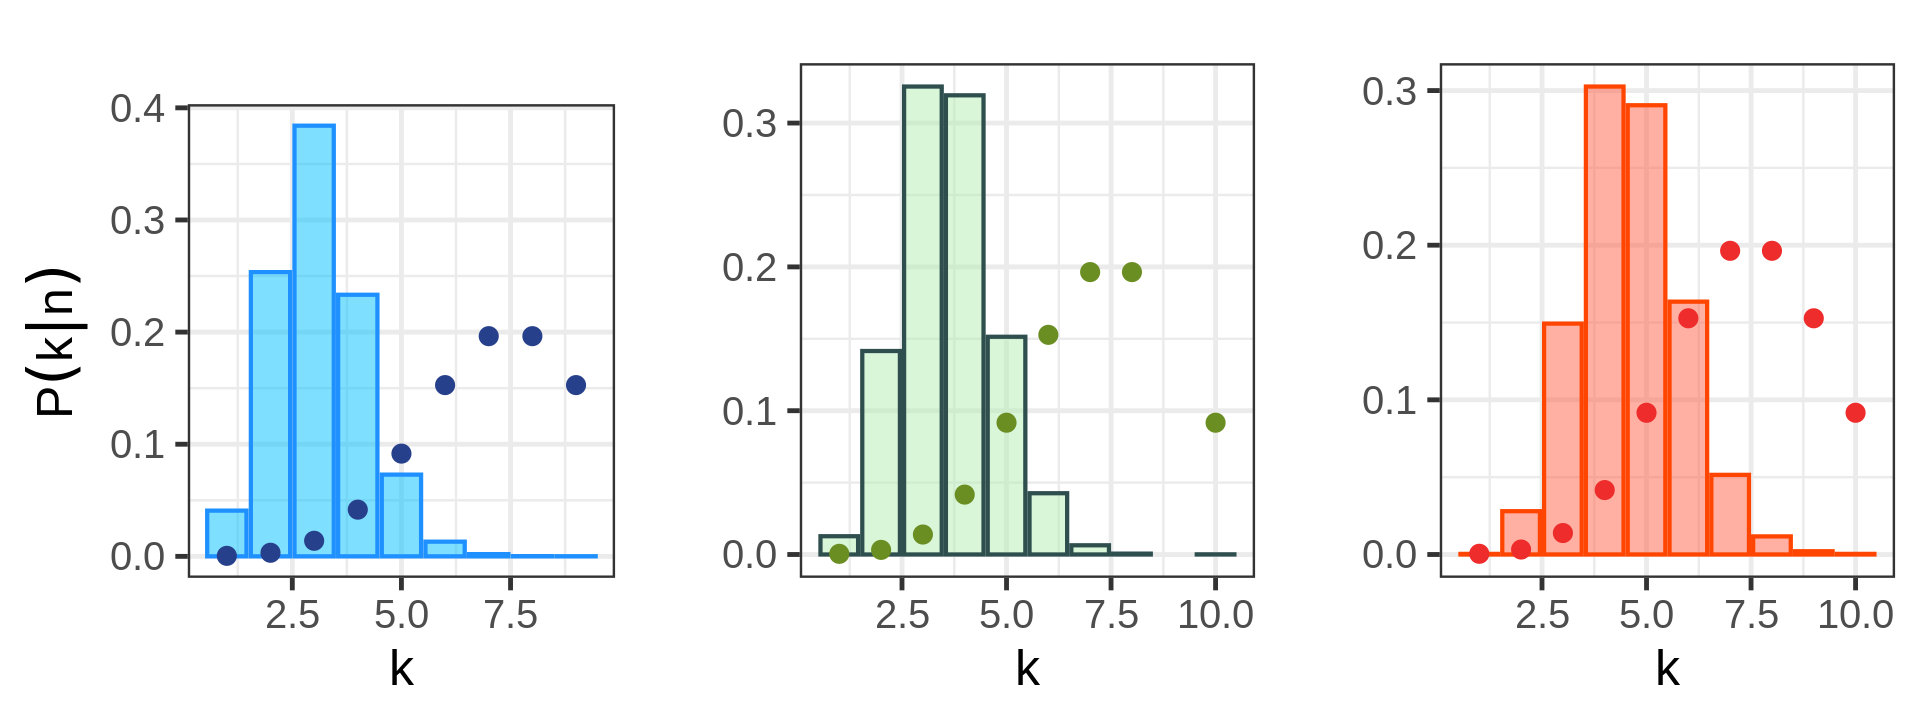

In [34]:
pdf('images/gamma_mean_plots.pdf', width=18, height=6)
set.seed(2026924) ## set random seed for simulations

## Plotting
p1_g <- attractors_05 %>% ggplot(aes(x = k, y = freq)) +
      geom_bar(stat = "identity", alpha = 0.5, colour = "dodgerblue", size=1.2, fill = "deepskyblue") +
      geom_point(aes(y = expectation), shape = 19, size = 5, col="royalblue4") + 
      xlab(TeX("$k$")) + ylab(TeX("$P(k|n)$")) + ggtitle("") + theme_bw(base_size = 30) +
      # xlab("$k$") + ylab("$\\mathcal{P}(k|n)$") + ggtitle("$\\gamma = \\frac{1}{2}$") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA)) # bg of the plot
            
p2_g <- attractors_1 %>% ggplot(aes(x = k, y = freq)) +
      geom_bar(stat = "identity", alpha = 0.5, colour = "darkslategray", size=1.2, fill = "darkseagreen2") +
      geom_point(aes(y = expectation), shape = 19, size = 5, col="olivedrab") + 
      xlab(TeX("$k$")) + ylab("") + ggtitle(TeX("")) + theme_bw(base_size = 30) +
      # xlab("$k$") + ylab("") + ggtitle("$\\gamma = 1$") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA)) # bg of the plot

p3_g <- attractors_2 %>% ggplot(aes(x = k, y = freq)) +
      geom_bar(stat = "identity", alpha = 0.5, colour = "orangered", size=1.2, fill = "tomato") +
      geom_point(aes(y = expectation), shape = 19, size = 5, col="firebrick2") + 
      xlab(TeX("$k$")) + ylab("") + ggtitle(TeX("")) + theme_bw(base_size = 30) +
      # xlab("$k$") + ylab("") + ggtitle("$\\gamma = 2$") + theme_bw() +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA)) # bg of the plot

grid.arrange(p1_g, p2_g, p3_g, ncol=3) # plot
dev.off() # for saving the plot

options(repr.plot.width=16, repr.plot.height=6)  #to set graph size
grid.arrange(p1_g, p2_g, p3_g, ncol=3) # to show here the plot

## Analitical computations for mode of new distribution

In [5]:
# support functions
phiinv <- function(q){ 
  supp <- 2*q -1
  supp <- erfinv(supp)
  return(sqrt(2)*supp)
}

# relationship between q, gamma, u
trasc_eqn <- function(q, gamma){
  supp <- exp(-(phiinv(1-q)^2)/2)
  supp <- supp - sqrt(2*pi)*q*phiinv(1-q)
  supp <- supp / (sqrt(2*pi))
  supp <- supp/(gamma + phiinv(1-q))

  return(supp)
}

# root finding function
uniroot.all <- function (f, interval, lower= min(interval),
        upper= max(interval), tol= .Machine$double.eps^0.2,
        maxiter= 1000, trace = 0, n = 100, ... ) {

## error checking as in uniroot...
  if (!missing(interval) && length(interval) != 2)
     stop("'interval' must be a vector of length 2")
  if (!is.numeric(lower) || !is.numeric(upper) || lower >=
     upper)
    stop("lower < upper  is not fulfilled")
 
## subdivide interval in n subintervals and estimate the function values
  xseq <- seq(lower,upper,len=n+1)
  mod  <- f(xseq,...)

## some function values may already be 0
  Equi <- xseq[which(mod==0)]

  ss   <- mod[1:n]*mod[2:(n+1)]  # interval where functionvalues change sign
  ii   <- which(ss<0)

  for (i in ii)
    Equi <- c(Equi, uniroot(f,lower=xseq[i],upper=xseq[i+1], maxiter = maxiter, tol = tol, 
               trace = trace, ...)$root)

  return(Equi)
}

In [6]:
# set parameter space
gammas <- seq(0.01,1.5, length.out = 50)
log2us <- seq(-3,1, length.out = 50)

us <- 2^log2us

In [7]:
# compute expectation values by inverting numerically the q, gamma, u relationship
qstars <-  matrix(, nrow = length(gammas), ncol = length(us))

for(i in seq(1, length(gammas))){
   for(j in seq(1, length(us))){
     find_q <- function(q){us[j] - trasc_eqn(q, gammas[i])}

     qstars[i, j] <- uniroot.all(find_q, lower=0.1, upper=0.9)[1]
  }  
 }


In [8]:
qstars.df <- as.data.frame(qstars) 

colnames(qstars) <- log2us
rownames(qstars) <- gammas
# us.df %>% as.data.frame() %>%  rownames_to_column("$q*{\\star}$") %>%
  # pivot_longer(-c(f_id), names_to = "samples", values_to = "counts")
qstars.plot = melt(qstars)
colnames(qstars.plot)[3] <- "mode"

# boh = qstars.plot
# boh %>% filter(mode > 0.495 & mode< 0.505, Var1>0.8 & Var1<1.2)
head(qstars.plot)

,Var1,Var2,mode
,<dbl>,<dbl>,<dbl>
1,0.01000000,-3,0.1955182
2,0.04040816,-3,0.1987485
3,0.07081633,-3,0.2020354
4,0.10122449,-3,0.2053203
5,0.13163265,-3,0.2085676
6,0.16204082,-3,0.2120000


png 
  2

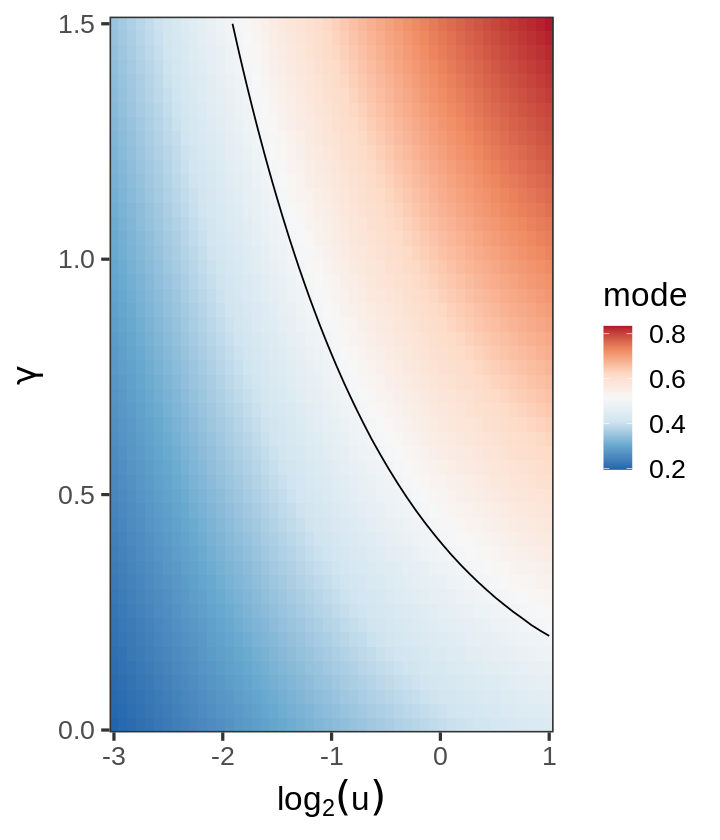

In [9]:
pdf('images/mode_3d.pdf', width=6, height=7)

mode_3d <- ggplot(qstars.plot, aes(x=Var2, y=Var1, fill=mode)) + #, aes(x=qstar, y=gammas, fill=value) ) + 
      # scale_fill_gradientn(colours = "Blue-Red 3") +
      # geom_raster(fill=density)+
      # stat_contour_filled() +
      geom_tile()+
      scale_fill_distiller(palette= "RdBu") +
      # stat_density_2d(aes(fill = ..density..), geom = "raster", contour = FALSE) +
      scale_x_continuous(expand = c(0, 0)) +
      scale_y_continuous(expand = c(0, 0))  +
      # ylab("$\\gamma$") + xlab("$\\log_{2}(u)$") + theme_bw() +
      ylab(TeX("$\\gamma$")) + xlab(TeX("$\\log_{2}(u)$")) + theme_bw(base_size = 20) +
      geom_contour(aes(z = mode), breaks = 0.5, col = 'black') +
      theme(plot.title = element_text(hjust = 0.5), panel.background = element_rect(fill = "transparent"), # bg of the panel
            plot.background = element_rect(fill = "transparent", color = NA), # bg of the plot
            legend.background=element_rect(fill = "transparent")
      )

mode_3d
dev.off() # for saving the plot

options(repr.plot.width=6, repr.plot.height=7)  #to set graph size
mode_3d

In [42]:
options(warn = defaultW) 